
#**Desafio 3 - Deadalus**
##Reconhecimento de imagem

In [161]:
# IMPORTAR BIBLIOTECAS
from PIL import Image
import numpy as np

In [162]:
# BUSCAR ARQUIVO DO GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Usar o ZipFile para fazer leitura do arquivo salvo no drive, 
extrair os arquivos para o google colab e por ultimo, 
fechar para economizar memoria
LINK DO ARQUIVO ZIP: https://drive.google.com/file/d/11-OYiW4QrRfOGvytKjJBHFxUzmiGetoP/view?usp=sharing

In [163]:
import zipfile
path = '/content/drive/MyDrive/Seletivo estagio Deadalus/Desafio 3/post-processed.zip'
#path = '/content/post-processed.zip'
zip_object = zipfile.ZipFile(file=path, mode='r') #Fazer leitura
zip_object.extractall('./') #Extrair para google colab
zip_object.close()

## Banco de imagens
- Listar todas as imagéns do banco
- Converter imagem para scala de cinza
- Tranformar imagem em formato numpy


In [164]:
import os
def dados_imagem():
  pastas = '/content/post-processed/'
  faces = []
  ids = []
  n = 0
  for diretorio, subpastas, arquivos in os.walk(pastas):
    for arq in arquivos:
      if arq.endswith("png") or arq.endswith("jpg"):
        numeros_arq = int(arq.replace(str(arq), str(len(arq))))
        pathImagem = os.path.join(diretorio, arq)
        etiqueta = os.path.basename(diretorio).replace(" ", "-").lower()
        imagem = Image.open(pathImagem).convert('L') #Conversao para escala de cinza
        imagem_np = np.array(imagem, 'uint8') # Imagem formato numpy
        id = int(pathImagem.split('_')[-2]) # +int(n)  # Se for pra ter uma busca com numeros diferente, é só descomentar pra fazer busca de uma pessoa específica
        ids.append(id)
        faces.append(imagem_np)
        n+=1
  return np.array(ids), faces

In [165]:
ids, faces = dados_imagem()

In [166]:
print(ids)

[2 2 1 ... 1 1 4]


In [167]:
print(faces[3])

[[ 10   8   9 ...  82  82  82]
 [  8   7   8 ...  82  82  82]
 [ 10  11  12 ...  82  82  82]
 ...
 [106  96  87 ...  74  75  76]
 [112 100  90 ...  74  75  76]
 [114 101  92 ...  75  75  76]]


##Treinamento

In [168]:
import cv2
#aprendizado supervisionado
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids) # aqui vai fazer o treinamento
lbph.write('classificadorLBPH.yml') # vamos usar esse arquivo posteriormente para fazer o reconhecimento facil

### Classificação


In [169]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create(2 ,2 ,7 ,15)
reconhecedor.read('/content/classificadorLBPH.yml')

In [170]:
imagem_teste = '/content/marcelinho_na_inferencia_0091_0091.jpg'

In [171]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')

In [172]:
idprevisto, _ = reconhecedor.predict(imagem_np)
idprevisto

91

In [173]:
idcorreto = int(imagem_teste.split('_')[-2]) #int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', '').replace('_', ''))
idcorreto

91

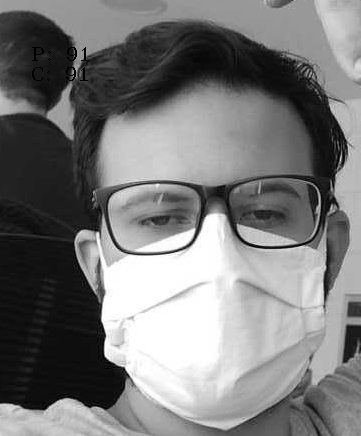

In [174]:
from google.colab.patches import cv2_imshow
x = 30
y= 30
cv2.putText(imagem_np, 'P: ' + str(idprevisto), (x,y + 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'C: ' + str(idcorreto), (x,y + 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)